# Introduction

**Abstract:** This project analyzes the Titanic dataset to predict survival based on passenger features.

**Student Name:** Your Name Here

# Imports

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# AutoViz
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

# PyCaret
!pip install pycaret
from pycaret.classification import *

# Warnings
import warnings
warnings.filterwarnings('ignore')

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


# Input Data

In [2]:
# Load Titanic dataset from seaborn (as sample input)
import seaborn as sns
df = sns.load_dataset('titanic')
df.to_csv('titanic.csv', index=False)  # Save a local copy for AutoViz
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Explore Data

In [3]:
# Summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Statistical summary
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Analysis of Nulls
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Shape of your Data Set loaded: (891, 15)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  4
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    15 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 107 du

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
survived,int64,0.000000,0,0.000000,1.000000,No issue
pclass,int64,0.000000,0,1.000000,3.000000,No issue
sex,object,0.000000,0,,,No issue
age,float64,13.520408,NA,0.420000,80.000000,"106 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 7 outliers greater than upper bound (67.50) or lower than lower bound(-8.50). Cap them or remove them."
sibsp,int64,0.000000,0,0.000000,8.000000,Column has 39 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
parch,int64,0.000000,0,0.000000,6.000000,Column has 15 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
fare,float64,0.000000,NA,0.000000,512.329200,Column has 102 outliers greater than upper bound (73.20) or lower than lower bound(-31.04). Cap them or remove them.
embarked,object,0.255102,0,,,"2 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
class,object,0.000000,0,,,No issue
who,object,0.000000,0,,,No issue


Number of All Scatter Plots = 3


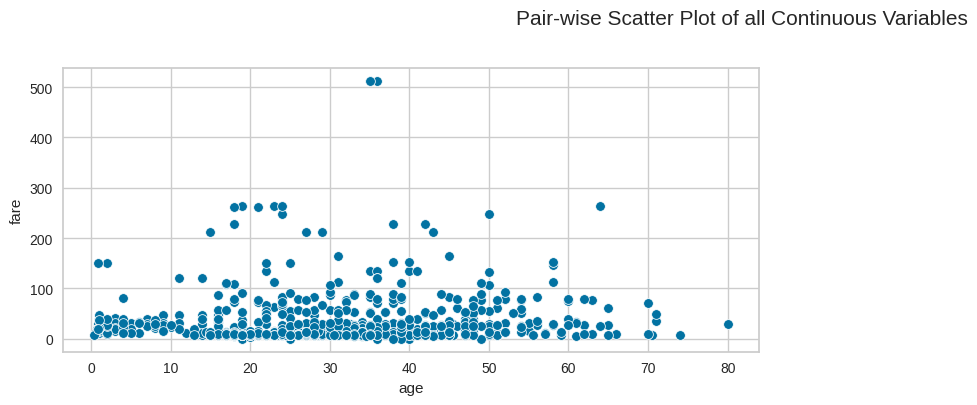

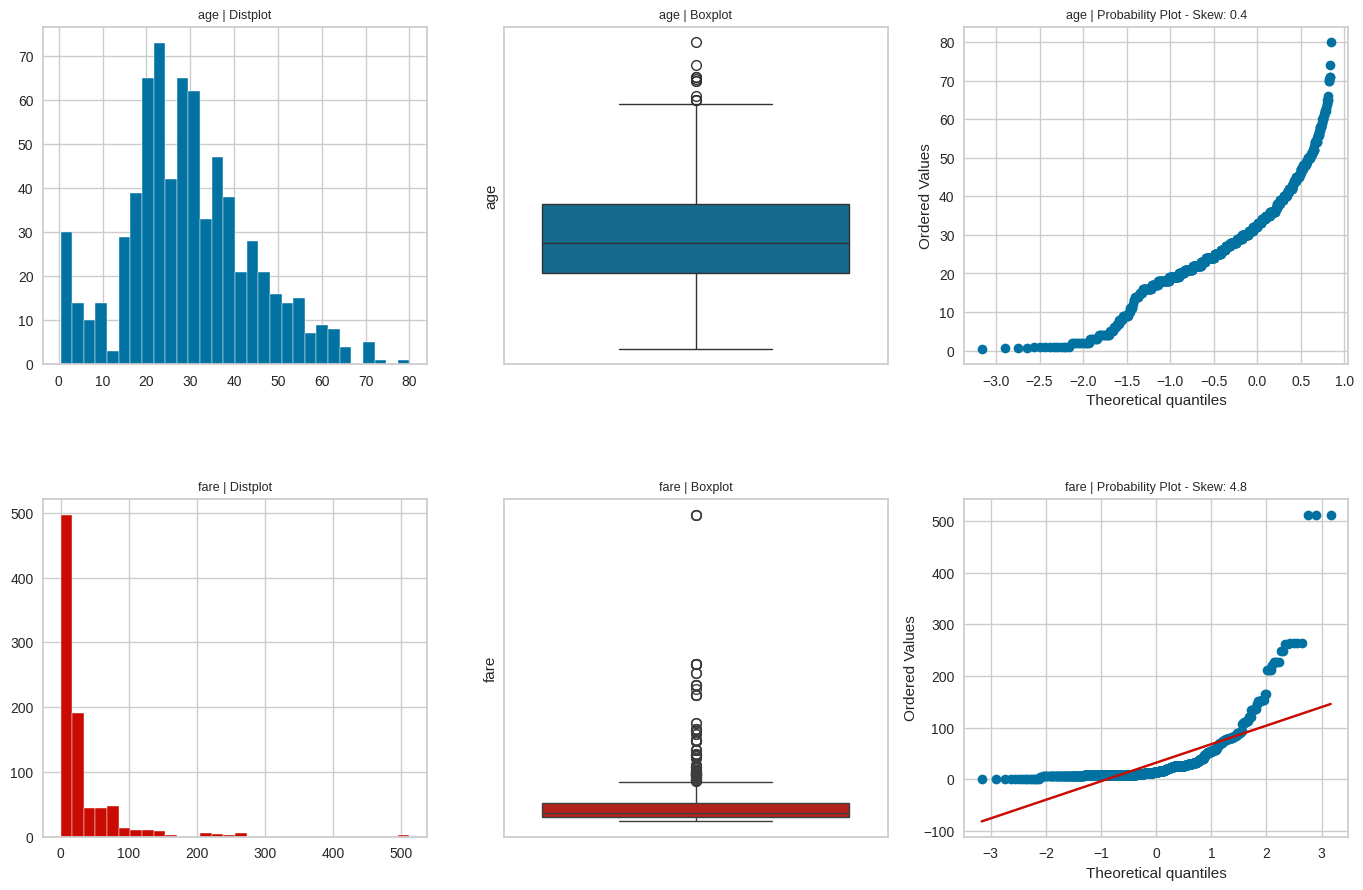

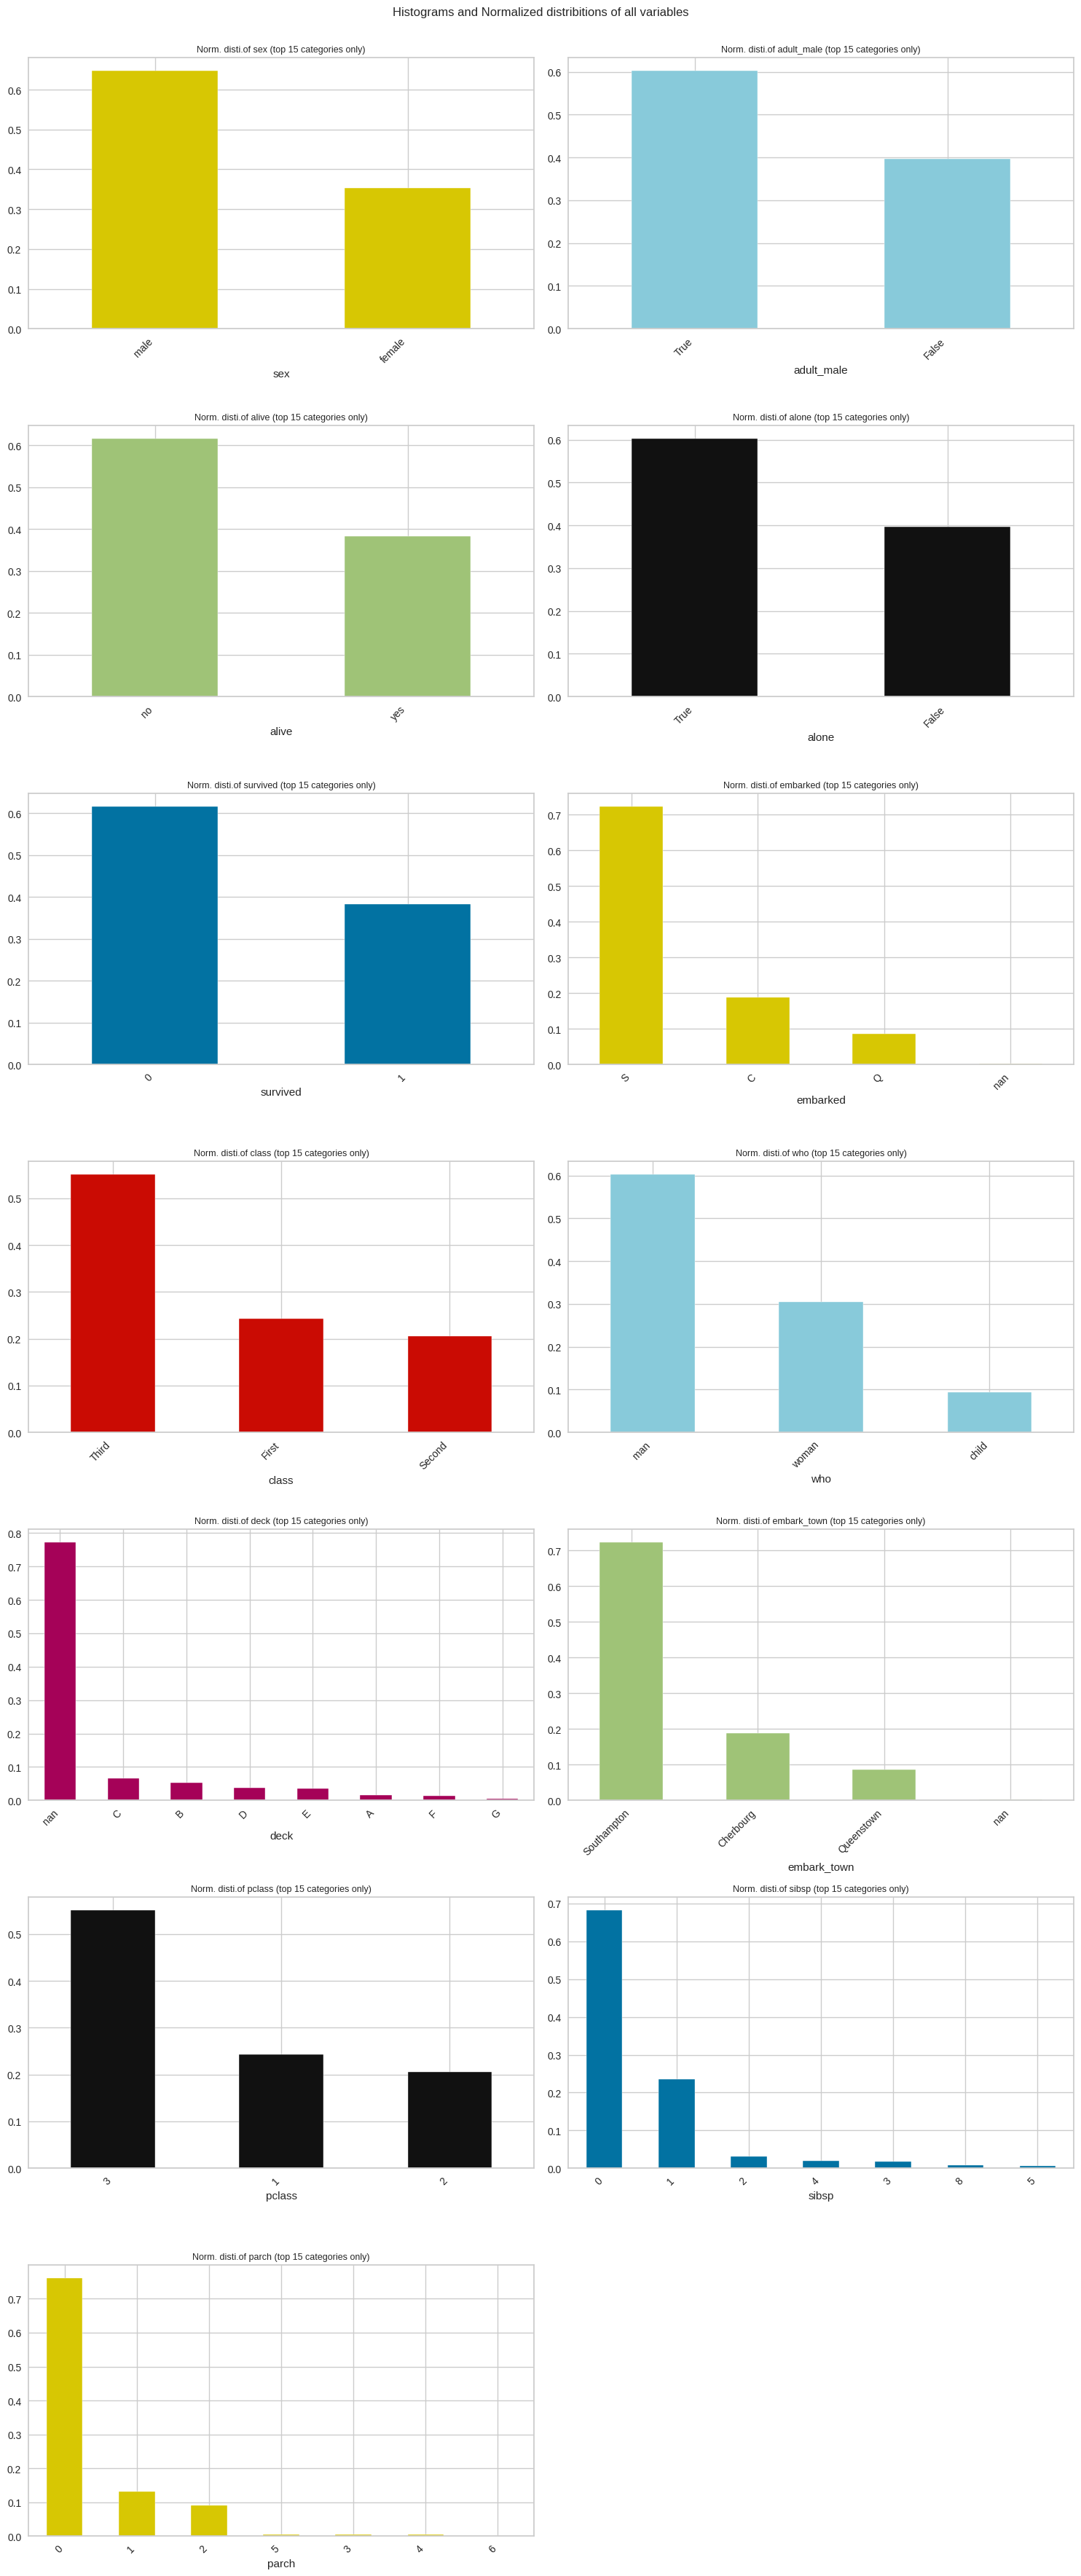

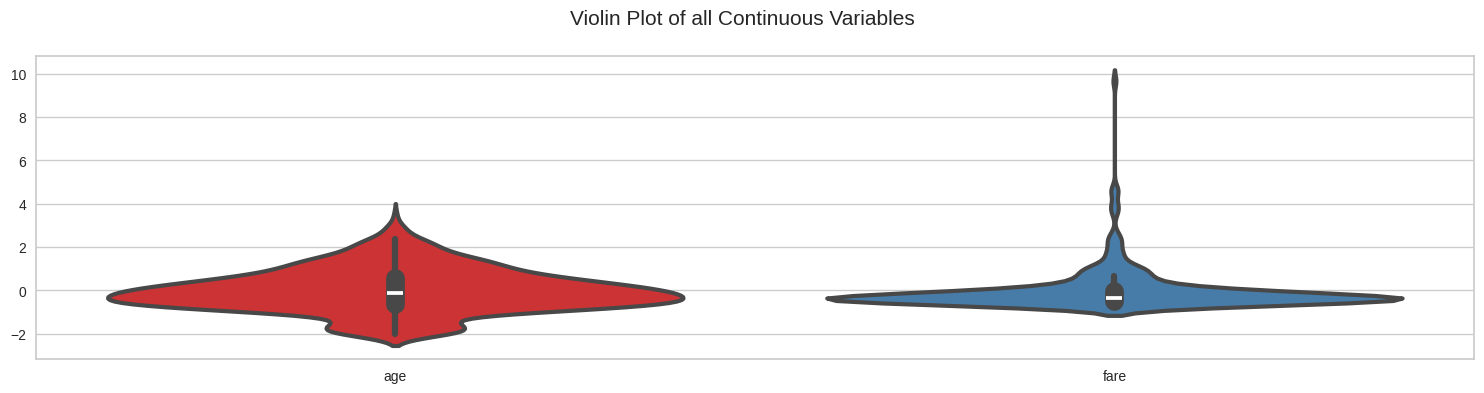

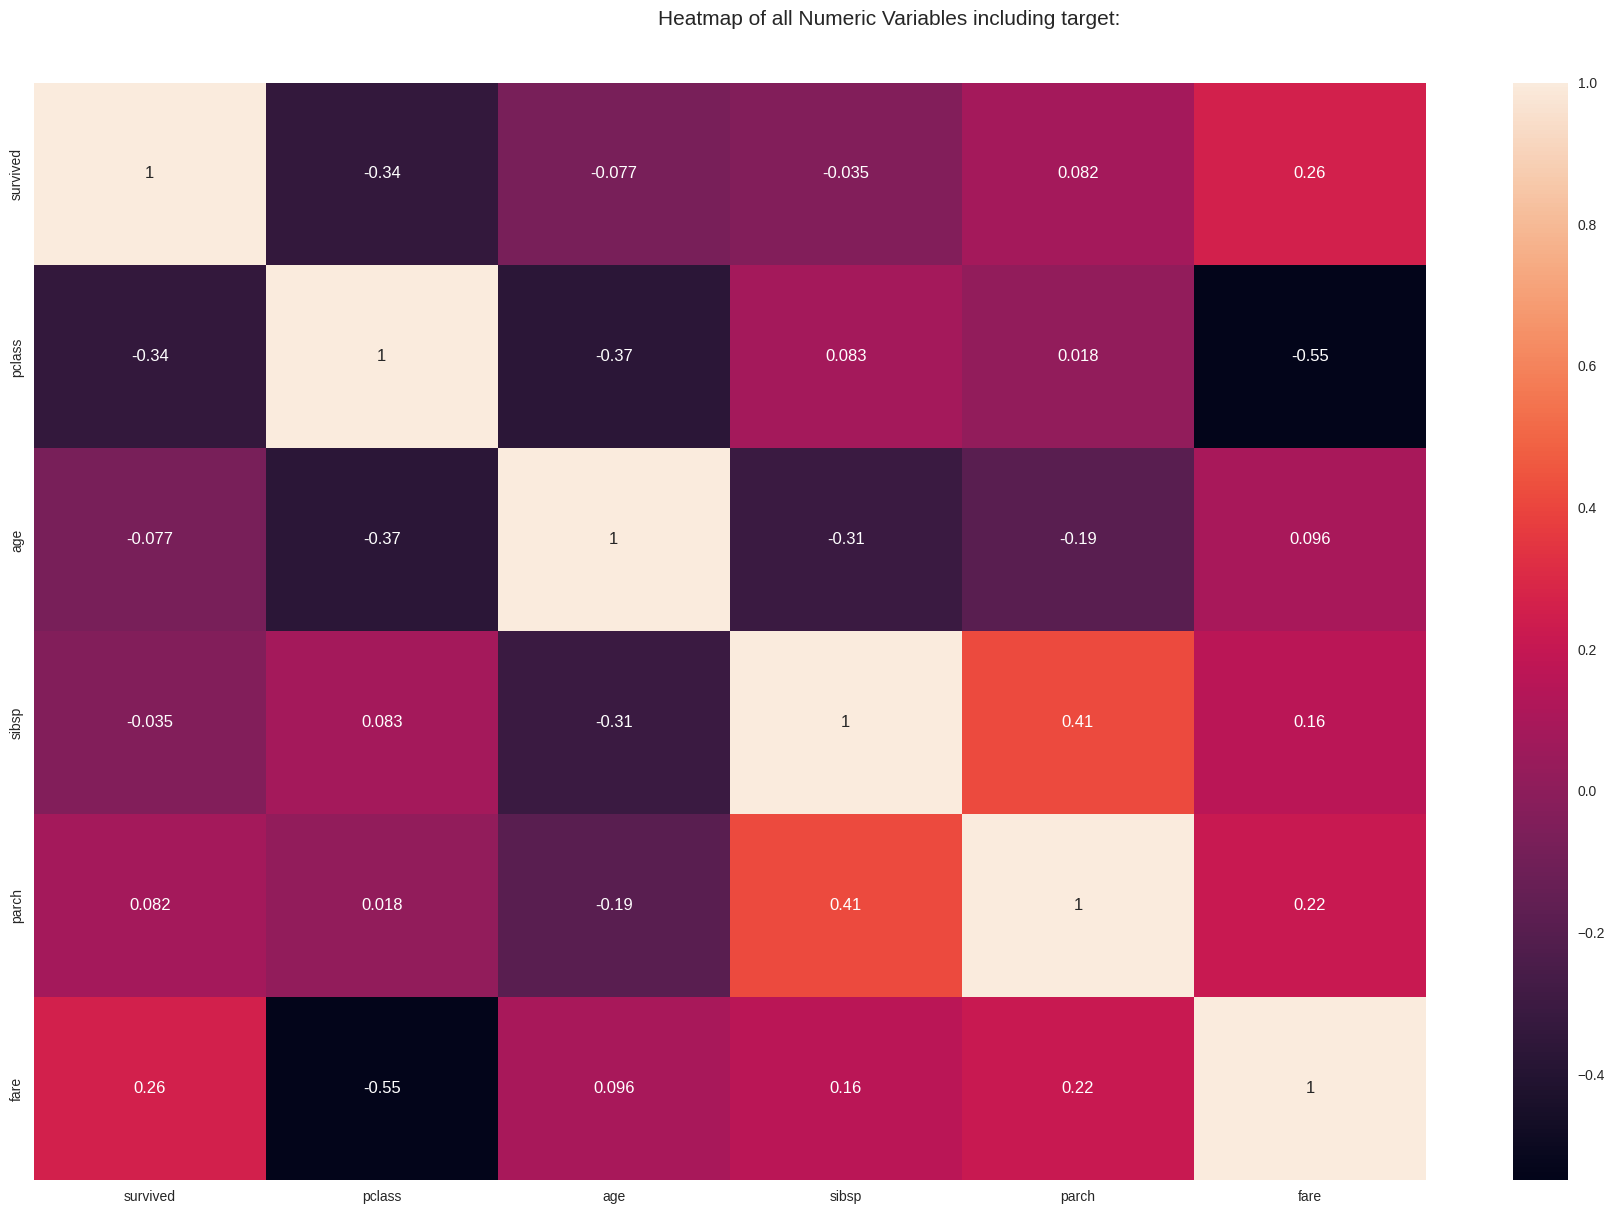

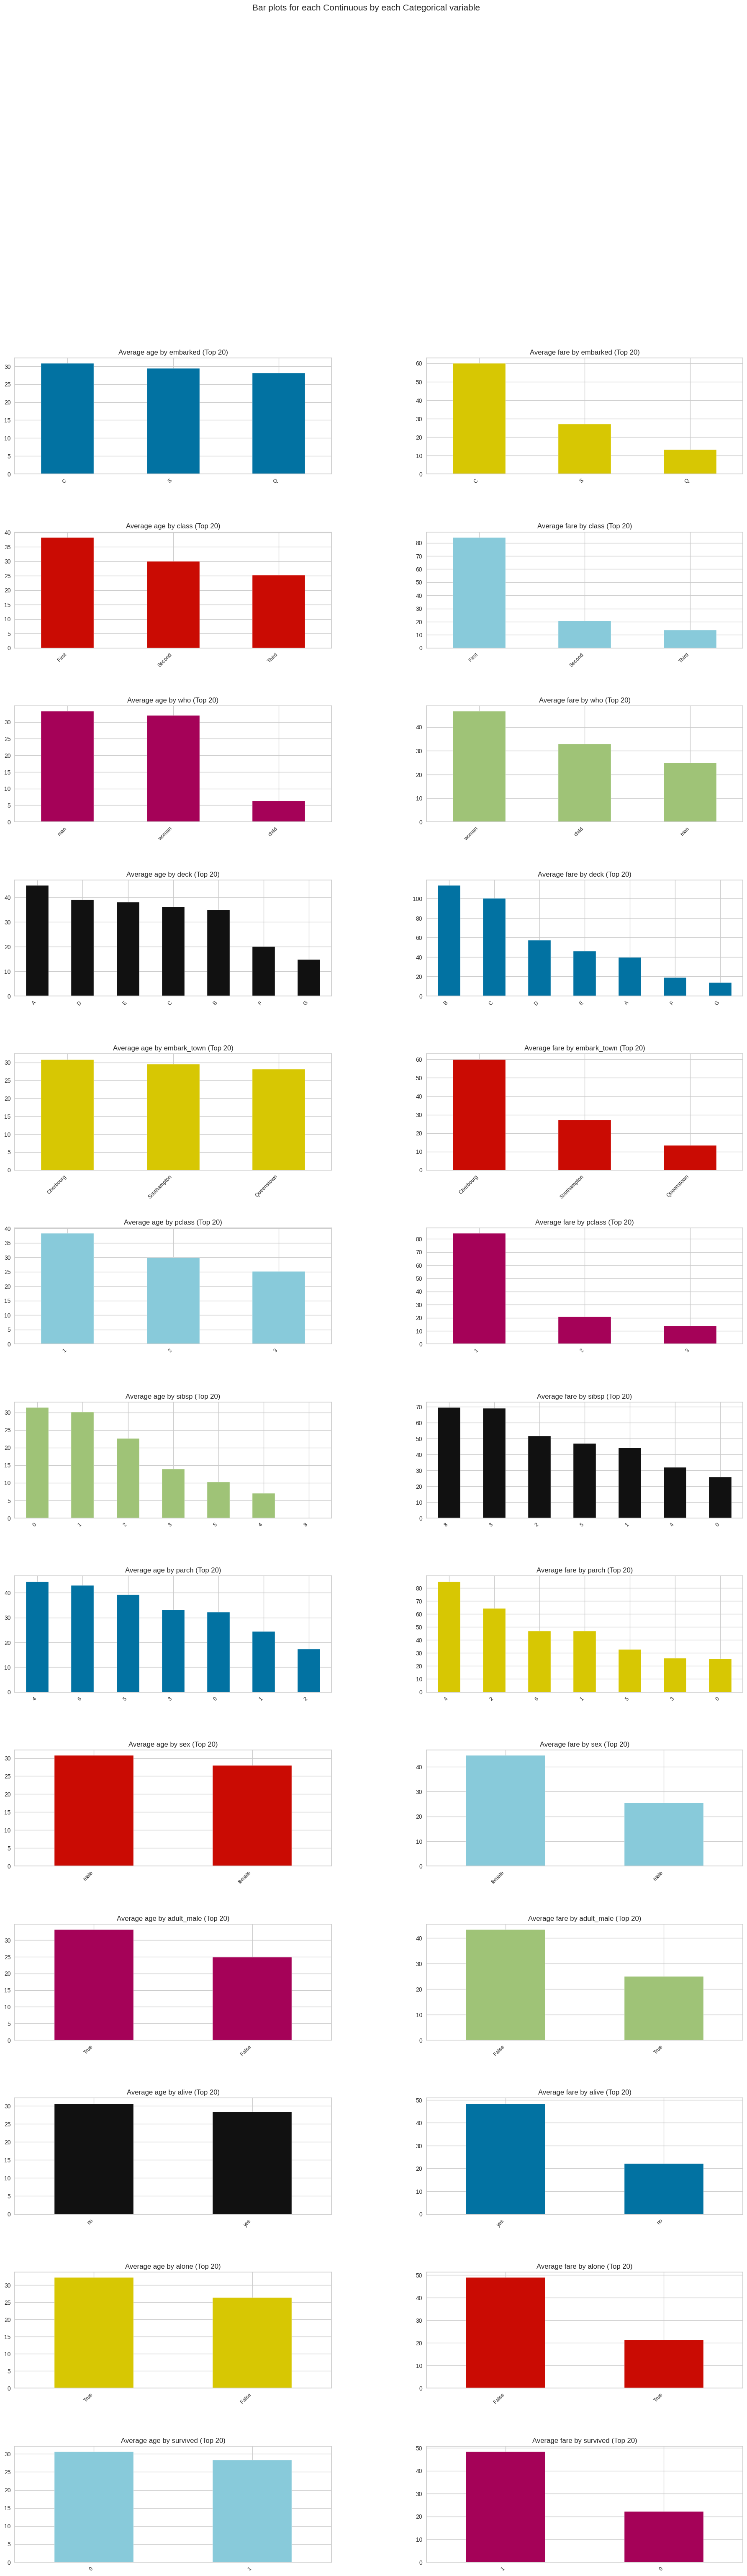

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [6]:
# AutoViz visualization
AV = AutoViz_Class()
auto_viz = AV.AutoViz('titanic.csv')

# Prepare Data

In [7]:
# Drop columns with many missing values or irrelevant
df_clean = df.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'])
# Fill missing values
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
df_clean['embarked'] = df_clean['embarked'].fillna(df_clean['embarked'].mode()[0])
df_clean.dropna(inplace=True)
df_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


# Model

In [8]:
# Setup PyCaret
clf1 = setup(data=df_clean, target='survived', session_id=123)

# Compare models
compare_models()
# COmpare_models(include = ['rf', 'xgboost'])

,Description,Value
0,Session id,123
1,Target,survived
2,Target type,Binary
3,Original data shape,"(891, 9)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Numeric features,5
8,Categorical features,2
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8138,0.8436,0.6986,0.7901,0.7396,0.5961,0.6002,0.1700
rf,Random Forest Classifier,0.8089,0.8402,0.7194,0.7706,0.7423,0.5908,0.5933,0.1670
lightgbm,Light Gradient Boosting Machine,0.8089,0.8423,0.7069,0.7829,0.7373,0.5884,0.5950,0.3950
xgboost,Extreme Gradient Boosting,0.7993,0.8307,0.6986,0.7610,0.7258,0.5683,0.5717,0.6410
lr,Logistic Regression,0.7976,0.8585,0.7071,0.7512,0.7242,0.5654,0.5698,0.5400
lda,Linear Discriminant Analysis,0.7959,0.8560,0.7031,0.7513,0.7237,0.5628,0.5657,0.1010
ada,Ada Boost Classifier,0.7945,0.8394,0.7283,0.7355,0.7289,0.5639,0.5668,0.1030
ridge,Ridge Classifier,0.7943,0.8559,0.6989,0.7498,0.7205,0.5588,0.5620,0.0470
et,Extra Trees Classifier,0.7881,0.8238,0.7069,0.7322,0.7179,0.5484,0.5499,0.3240
qda,Quadratic Discriminant Analysis,0.7752,0.8101,0.6527,0.7344,0.6683,0.5079,0.5185,0.0460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Evaluate

In [9]:
# Create and evaluate a Random Forest model
rf_model = create_model('rf')
evaluate_model(rf_model)
predict_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8622,0.7500,0.7826,0.7660,0.6268,0.6272
1,0.8571,0.8499,0.7917,0.8261,0.8085,0.6947,0.6951
2,0.8095,0.8349,0.6667,0.8000,0.7273,0.5828,0.5885
3,0.8226,0.8690,0.6522,0.8333,0.7317,0.6021,0.6122
4,0.7258,0.7111,0.5833,0.6667,0.6222,0.4085,0.4108
5,0.8226,0.8514,0.7083,0.8095,0.7556,0.6173,0.6207
6,0.9032,0.8958,0.8750,0.8750,0.8750,0.7961,0.7961
7,0.8065,0.8224,0.7500,0.7500,0.7500,0.5921,0.5921
8,0.7581,0.8591,0.6667,0.6957,0.6809,0.4862,0.4865


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7799,0.8559,0.6699,0.7340,0.7005,0.5270,0.5284


,pclass,sex,age,sibsp,parch,fare,embarked,alone,survived,prediction_label,prediction_score
178,2,male,30.0,0,0,13.000000,S,True,0,1,0.6557
457,1,female,28.0,1,0,51.862499,S,False,1,1,1.0000
16,3,male,2.0,4,1,29.125000,Q,False,0,0,0.8700
95,3,male,28.0,0,0,8.050000,S,True,0,0,1.0000
120,2,male,21.0,2,0,73.500000,S,False,0,0,0.9800
...,...,...,...,...,...,...,...,...,...,...,...
429,3,male,32.0,0,0,8.050000,S,True,1,0,0.9500
615,2,female,24.0,1,2,65.000000,S,False,1,1,0.9500
860,3,male,41.0,2,0,14.108300,S,False,0,0,0.9700
660,1,male,50.0,2,0,133.649994,S,False,1,0,0.7900


# Tune, Best Model

In [10]:
tuned_rf = tune_model(rf_model)
final_rf = finalize_model(tuned_rf)
save_model(final_rf, 'final_rf_model')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8730,0.8659,0.7083,0.9444,0.8095,0.7172,0.7339
1,0.8254,0.7890,0.7083,0.8095,0.7556,0.6207,0.6240
2,0.7778,0.8894,0.5000,0.8571,0.6316,0.4878,0.5241
3,0.8226,0.8534,0.6087,0.8750,0.7179,0.5945,0.6154
4,0.7419,0.7440,0.3750,0.9000,0.5294,0.3907,0.4618
5,0.7419,0.8317,0.5000,0.7500,0.6000,0.4206,0.4394
6,0.8710,0.9194,0.7917,0.8636,0.8261,0.7238,0.7256
7,0.8065,0.7939,0.6667,0.8000,0.7273,0.5792,0.5850
8,0.7097,0.7769,0.5417,0.6500,0.5909,0.3688,0.3725


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pclass', 'age', 'sibsp', 'parch',
                                              'fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=['sex...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None,

# References

- Titanic dataset from seaborn
- PyCaret Documentation: https://pycaret.gitbook.io/docs/
- AutoViz GitHub: https://github.com/AutoViML/AutoViz